# Momentum optimization

 1. $m \leftarrow \beta m+\eta \nabla_{\theta}J(\theta)$
 2. $\theta \leftarrow \theta-m$
 
 typically $\beta$ is 0.9


# Nesterov accelarated gradient

1. $m\leftarrow\beta m + \eta \nabla_{\theta}J(\theta+\beta m)$
2. $\theta\leftarrow \theta-m$

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import fully_connected
import matplotlib.pyplot as plt
import time
import os

/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
home = os.environ['HOME']
input_path = home+'/program/ml/datasets/MNIST_data/'
mnist = input_data.read_data_sets(input_path,one_hot=True)

Extracting /Users/zyan/program/ml/datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting /Users/zyan/program/ml/datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /Users/zyan/program/ml/datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/zyan/program/ml/datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.labels.shape

(55000, 10)

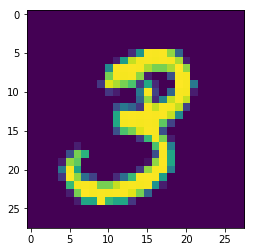

In [4]:
plt.imshow(mnist.train.images[1].reshape(28,28))

In [5]:
n_inputs = 28*28
n_hidden1 = 15*15
n_hidden2 = 10*10
n_outputs = 10
x = tf.placeholder(tf.float32,shape=(None,n_inputs),name='x')
y = tf.placeholder(tf.int32,shape=(None,n_outputs),name='y')

In [6]:
with tf.name_scope('dnn'):    
    hidden1 = fully_connected(x,n_hidden1,scope='hidden1')
    #hidden1 = tf.nn.dropout(hidden1,keep_prob=0.5)
    hidden2 = fully_connected(hidden1,n_hidden2,scope='hidden2')
    logits  = fully_connected(hidden2,n_outputs,scope='outputs',activation_fn=None)

In [18]:
with tf.name_scope('loss'):
    entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y)
    loss = tf.reduce_mean(entropy,name='loss')

In [39]:
learning_rate = 0.01
with tf.name_scope('train'):
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    optimizer = tf.train.AdamOptimizer(learning_rate,beta1=0.9,beta2=0.999)
    training_op = optimizer.minimize(loss)

In [40]:

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits,tf.argmax(y,1),1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))


In [41]:
init = tf.global_variables_initializer()

In [42]:
n_epochs= 2
batch_size = 1000
loss_train = []
loss_test = []

In [43]:
with tf.Session() as sess:
    start_time = time.clock()
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples//batch_size):
            x_batch,y_batch = mnist.train.next_batch(batch_size)
            _,loss_a =  sess.run([training_op,loss],feed_dict={x:x_batch,y:y_batch})
           # print('Epoch: ',epoch,'   itera: ',iteration,'  loss:' ,sess.run(accuracy,feed_dict={x:x_batch,y:y_batch}) )
            loss_train.append(loss_a)
    elapsed = time.clock()-start_time
    print('Time used : ',elapsed)

Time used :  7.615552999999977


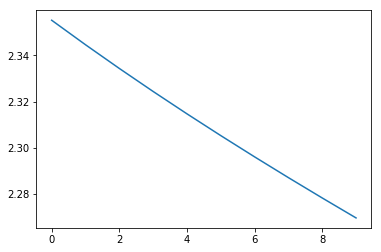

In [31]:
plt.plot(loss_train)

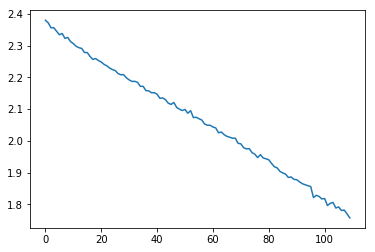

In [35]:
plt.plot(loss_train)

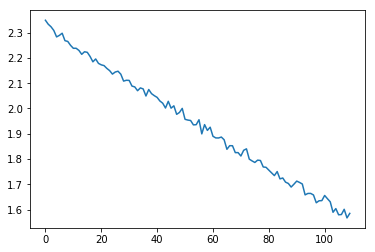

In [38]:
plt.plot(loss_train)

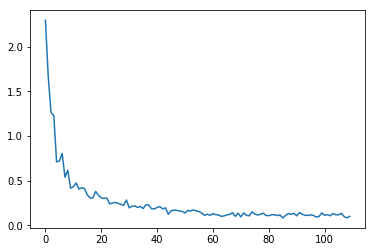

In [44]:
plt.plot(loss_train)